# Jupyter Notebook of Smart Factory Energy Prediction Challenge

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Initial Exploration

In [5]:
# Load the data
df = pd.read_csv("E:\mech_assign\data.csv")

# Initial exploration
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
display(df.info())

print("\nDescriptive statistics:")
display(df.describe().T)

Dataset shape: (16857, 29)

First 5 rows:


,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity              

None


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
zone2_humidity,15990.0,39.494553,10.129513,-77.265503,37.757500,40.293333,43.000000,77.265503
zone3_temperature,16055.0,21.665733,2.594309,6.543921,20.533333,21.767500,22.760000,36.823982
zone3_humidity,15979.0,38.201314,10.144388,-71.406273,36.592500,38.400000,41.433333,71.406273
zone4_temperature,16041.0,20.239922,2.783050,4.613485,19.266667,20.290000,21.356667,35.921144
zone4_humidity,16076.0,37.945608,10.769813,-81.446225,35.200000,38.090000,41.560833,81.446225
zone5_temperature,16019.0,19.052613,2.346158,5.921094,18.061111,19.050000,20.100000,32.157594
zone5_humidity,16056.0,50.289131,18.722516,-141.640143,45.290000,48.854429,53.918333,141.640143
zone6_temperature,16009.0,6.469934,8.867993,-42.987365,2.930000,6.263333,9.690000,55.932271
zone6_humidity,16010.0,59.162913,52.657787,-353.393026,37.066667,62.766667,86.590000,353.393026
zone7_temperature,16063.0,19.672472,2.879815,3.578021,18.500000,19.600000,21.000000,35.712952


## 2. Exploratory Data Analysis (EDA)

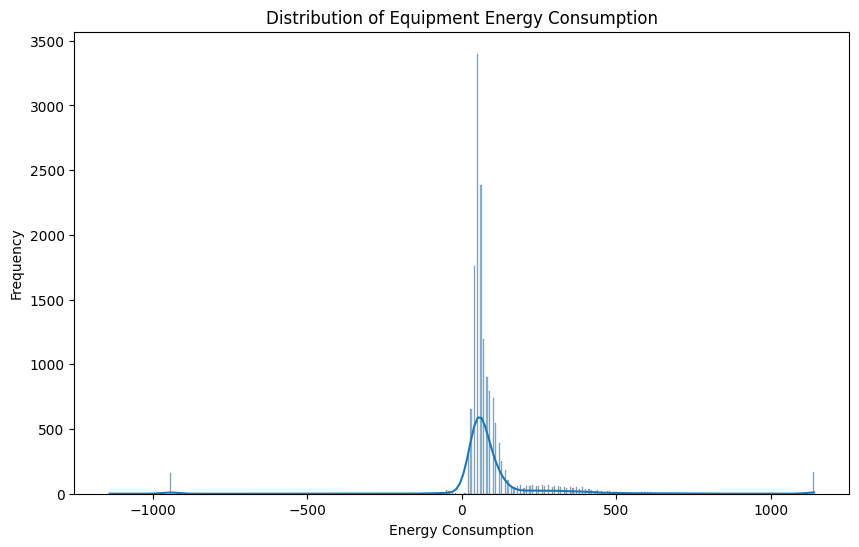

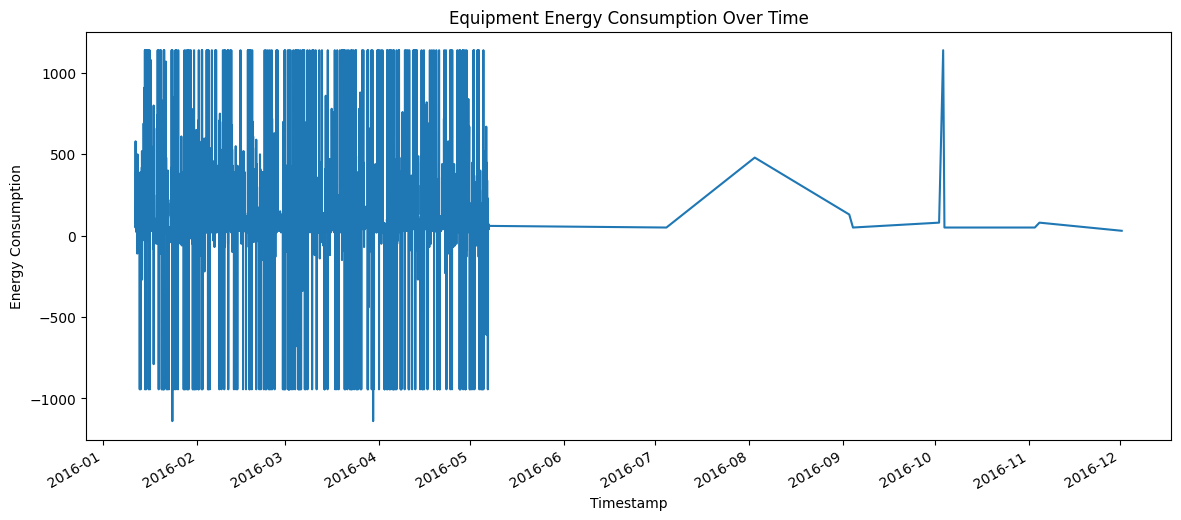

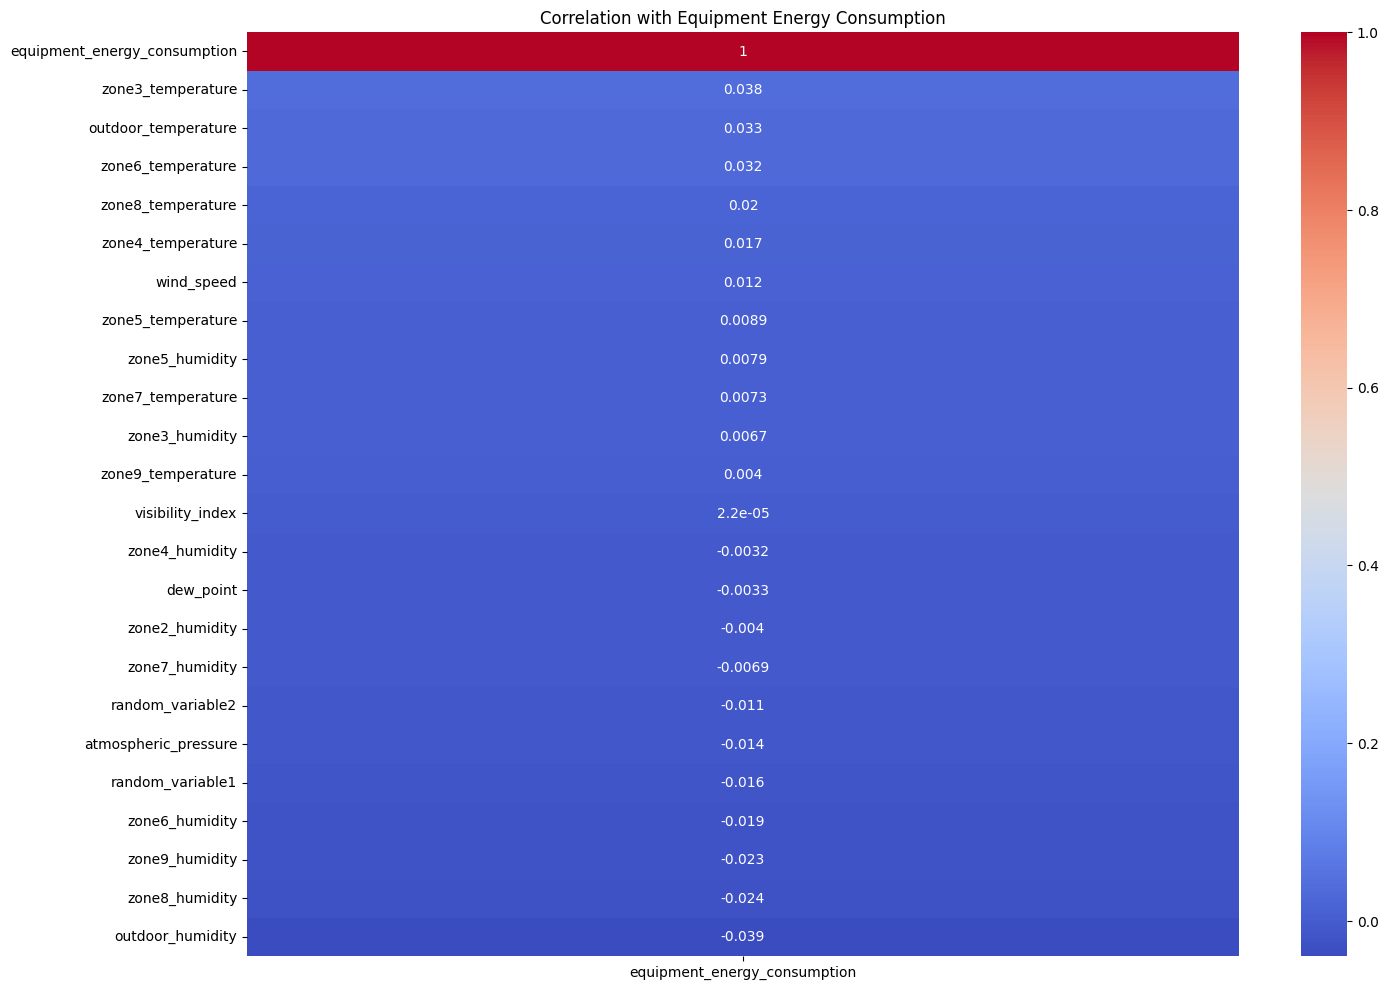


Analysis of random variables:
Random Variable 1 unique values: 15591
Random Variable 2 unique values: 15619


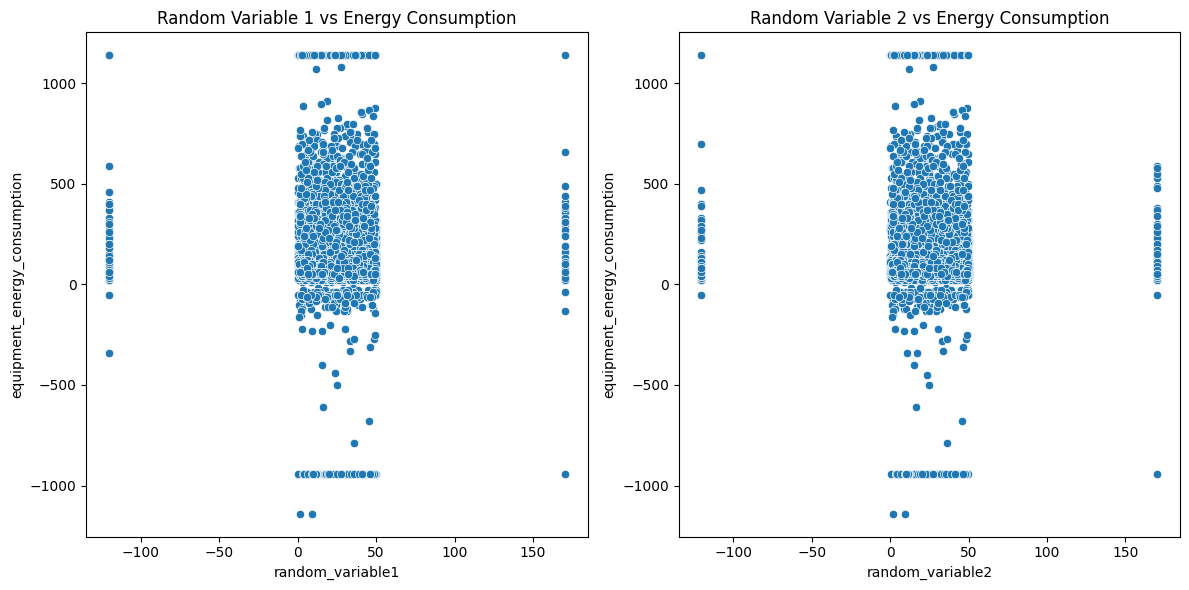

In [6]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Ensure target variable is numeric
df['equipment_energy_consumption'] = pd.to_numeric(df['equipment_energy_consumption'], errors='coerce')

# Drop rows with missing timestamp or target
df_plot = df.dropna(subset=['timestamp', 'equipment_energy_consumption'])

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df_plot['equipment_energy_consumption'], kde=True)
plt.title('Distribution of Equipment Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.show()

# Time series plot
plt.figure(figsize=(14, 6))
df_plot.set_index('timestamp')['equipment_energy_consumption'].plot()
plt.title('Equipment Energy Consumption Over Time')
plt.ylabel('Energy Consumption')
plt.xlabel('Timestamp')
plt.show()

# Correlation analysis
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix[['equipment_energy_consumption']].sort_values(
    by='equipment_energy_consumption', ascending=False), 
    annot=True, cmap='coolwarm')
plt.title('Correlation with Equipment Energy Consumption')
plt.show()

# Random variable analysis
print("\nAnalysis of random variables:")
print(f"Random Variable 1 unique values: {df['random_variable1'].nunique()}")
print(f"Random Variable 2 unique values: {df['random_variable2'].nunique()}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=df)
plt.title('Random Variable 1 vs Energy Consumption')

plt.subplot(1, 2, 2)
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=df)
plt.title('Random Variable 2 vs Energy Consumption')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [7]:
# Handle missing values in the original dataframe (for target check)
print("Missing values before imputation:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# Function to preprocess data
def preprocess_data(df):
    # Create time-based features
    df['hour'] = df['timestamp'].dt.hour
    df['day_part'] = pd.cut(
        df['hour'], 
        bins=[0, 6, 12, 18, 24],
        labels=['Night', 'Morning', 'Afternoon', 'Evening'],
        include_lowest=True
    )
    
    # Drop columns with high missing values or not useful
    df = df.drop(['timestamp', 'random_variable1', 'random_variable2'], axis=1)
    
    # Separate features and target
    X = df.drop('equipment_energy_consumption', axis=1)
    y = df['equipment_energy_consumption']
    
    # Handle categorical variables using one-hot encoding
    X = pd.get_dummies(X, columns=['day_part'], drop_first=True)
    
    # Convert all feature columns to numeric, coerce errors to NaN
    X = X.apply(pd.to_numeric, errors='coerce')
    
    return X, y

# Remove rows where target is missing
df = df.dropna(subset=['equipment_energy_consumption'])

# Convert timestamp to datetime if not already done
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Preprocess data
X, y = preprocess_data(df.copy())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Impute missing values in features using the median strategy
imputer = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Scale features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Preprocessing, imputation, and scaling complete.")

Missing values before imputation:
equipment_energy_consumption    912
zone9_humidity                  888
zone3_humidity                  878
zone1_temperature               867
zone2_humidity                  867
zone2_temperature               853
zone8_temperature               848
zone6_temperature               848
zone6_humidity                  847
atmospheric_pressure            842
zone5_temperature               838
wind_speed                      828
random_variable1                826
dew_point                       826
random_variable2                824
dtype: int64
Preprocessing, imputation, and scaling complete.
